<a href="https://colab.research.google.com/github/patricio200/IA2025/blob/main/Assignment_5_Patricio_Ramirez_Garc%C3%ADa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment 5: Artificial Neural Network: feedward**

---



---


Universidad Autonoma de Nuevo León - Facultad de Ingenieria Mecanica y Electrica
> Inteligencia Artifial | Ene - Jun 2025

Professor:

> Daniel Isaías López Páez

Students:

> 2077950 Patricio Ramirez García


**Objective**.- To train a Feedforward Neural Network model.


**Instructions**.-

The student will train a Feedforward Neural Network model in Google Colab using the Python programming language. This model will use the MNIST dataset; this dataset contains low-resolution images with handwritten digits from 0 to 9. The dataset is part of the Keras library. More information about this dataset: https://keras.io/api/datasets/mnist/

During data preprocessing, the "load_data()" function from the Keras library will be used to load the dataset and generate the training (train_data, train_labels) and test (test_data, test_label) datasets. The default data split provided by this function can be used.

A feedforward artificial neural network will be trained with the training data using the "fit" function from the scikit-learn library. The student will propose a structure for the feedforward artificial neural network. The activation function in the output layer should be softmax.

The type of loss function and optimizer to be used will be established. The metric to evaluate the training process will be accuracy.

Use the "evaluate" function to display the prediction accuracy of the model with the test dataset (test_data).

Perform 5 different predictions with the test dataset (test_data). In the result, display the prediction and the actual value.

**Step 1: Load libraries**

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import random
print(tf.__version__)



2.15.0


**Step 2: Load data**

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
class_names = ['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine', 'Ten']


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
len(test_labels)

10000

**Step 3: Data preprocessing**

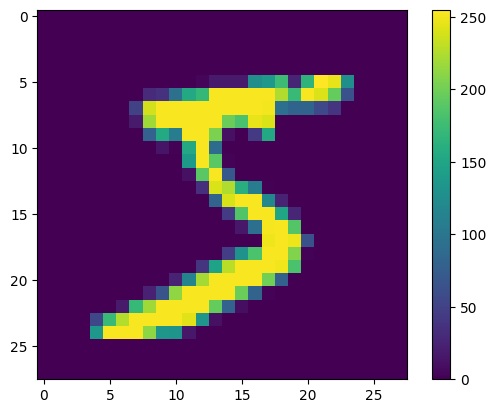

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

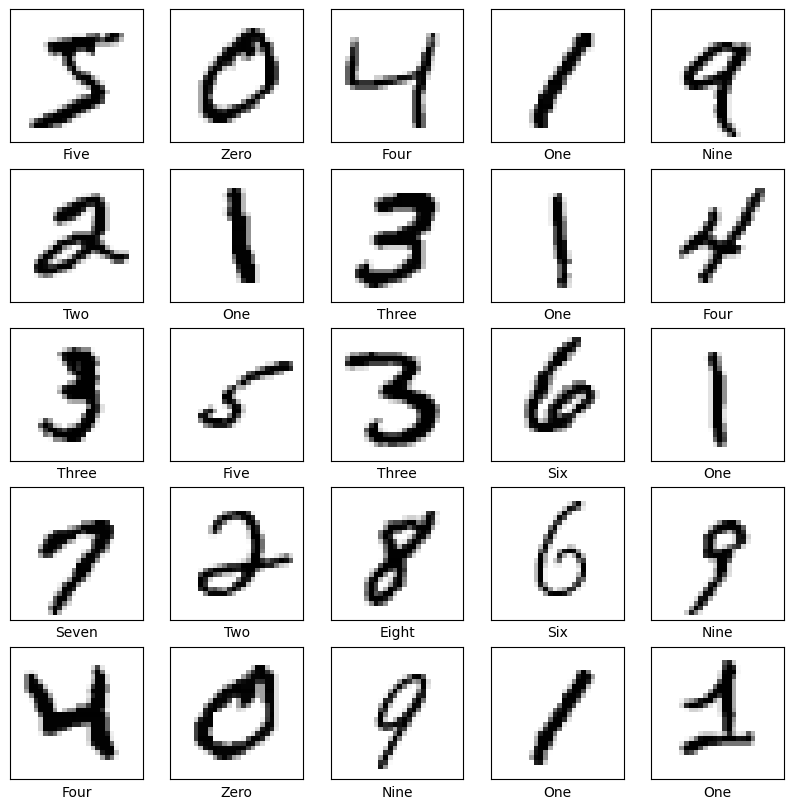

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

**Step 4: Model selection and training**

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2524 - accuracy: 0.9285
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1098 - accuracy: 0.9678
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0744 - accuracy: 0.9780
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0553 - accuracy: 0.9829
Epoch 5/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0438 - accuracy: 0.9864
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0335 - accuracy: 0.9893
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0275 - accuracy: 0.9916
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0221 - accuracy: 0.9936
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0187 - accuracy: 0.9940
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.01

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.0802 - accuracy: 0.9797 - 658ms/epoch - 2ms/step

Test accuracy: 0.9797000288963318


In [ ]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [ ]:
predictions[0]

array([1.4365892e-09, 4.1434238e-11, 1.6511437e-07, 2.8002012e-05,
       1.7186209e-13, 2.1135320e-10, 1.1713702e-16, 9.9997157e-01,
       9.2788483e-08, 9.8797877e-08], dtype=float32)

In [ ]:
np.argmax(predictions[0])

7

In [ ]:
test_labels[0]

7

**Step 5: Model testing**


In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

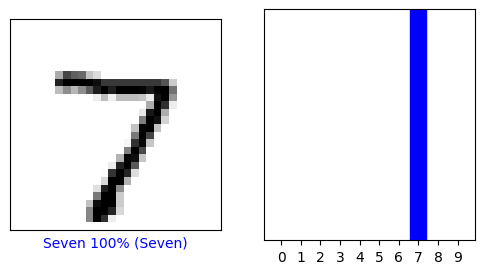

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

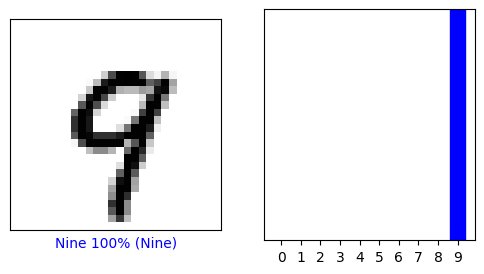

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

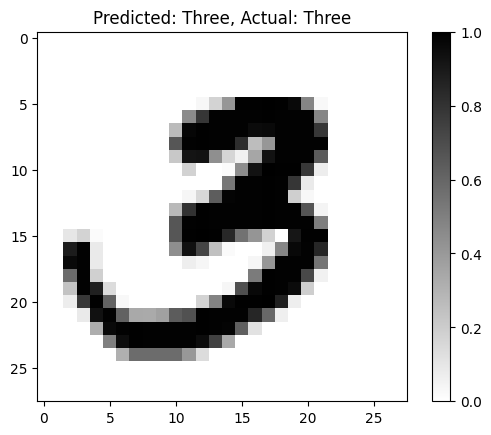

In [ ]:

# Function to display a random test image along with its predicted and actual values
def display_random_prediction(test_images, predictions, test_labels, class_names):
    # Selecting a random index
    index = random.randint(0, len(test_images) - 1)
    # Displaying the image
    plt.figure()
    plt.imshow(test_images[index], cmap=plt.cm.binary)
    plt.colorbar()
    plt.grid(False)
    plt.title(f"Predicted: {class_names[np.argmax(predictions[index])]}, Actual: {class_names[test_labels[index]]}")
    plt.show()

# Displaying 5 random predictions
for _ in range(1):
    display_random_prediction(test_images, predictions, test_labels, class_names)


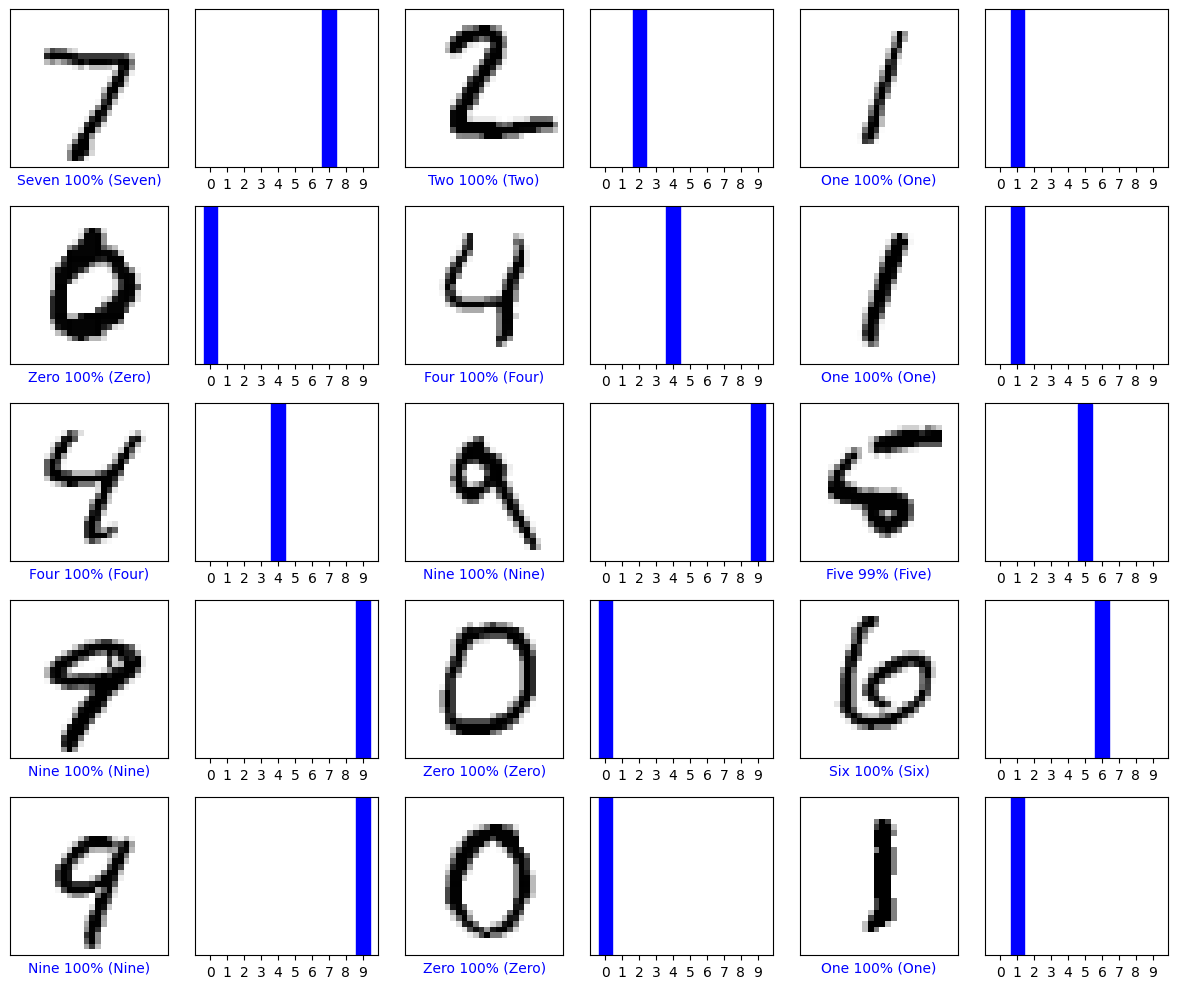

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()



---



In [ ]:
img = test_images[1]

print(img.shape)

(28, 28)


In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 63ms/step
[[ -6.0673985   1.8721052  13.255757   -2.9312365 -20.000565   -3.244327
   -8.741362  -23.704916   -2.9687836 -16.20752  ]]


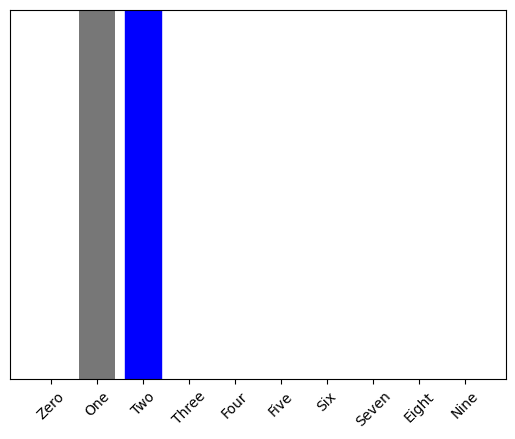

In [ ]:
# Plot the value array
plot_value_array(1, predictions_single[0], test_labels)

# Set the correct number of ticks and labels
_ = plt.xticks(range(10), class_names[:10], rotation=45)

# Show the plot
plt.show()

In [ ]:
np.argmax(predictions_single[0])

2